# Solar radiation nowcasting using Markov Chain
##### Xinyuan Hou, 25.06.2021
##### Supervised by Dr. Stelios Kazadzis

## Progress

- Data from Copernicus Atmosphere Monitoring Service (CAMS)
    - 15min interval
    - Testbed: Berlin & Athens
- Global Horizontal Irradiation (all-sky & Clear-Sky)
$$CMF = \frac{GHI}{GHI_{CS}}$$
- Cloud Modification Factor (CMF) 
    - -> 0: highly cloudy
    - = 1: cloudless

#### Markov Chain

**Markov property**: evolution of the Markov process in the future depends only on the present state and does not depend on past.

1. function `classify(arr...)`

    -> `state` ->

2. function `mcFit(state, order...)`

    -> `T` (transition matrix) ->

3. function `mcPredict(T, data_test...)`

    -> weighted mean of `T` -> `pred`

#### Results for Berlin

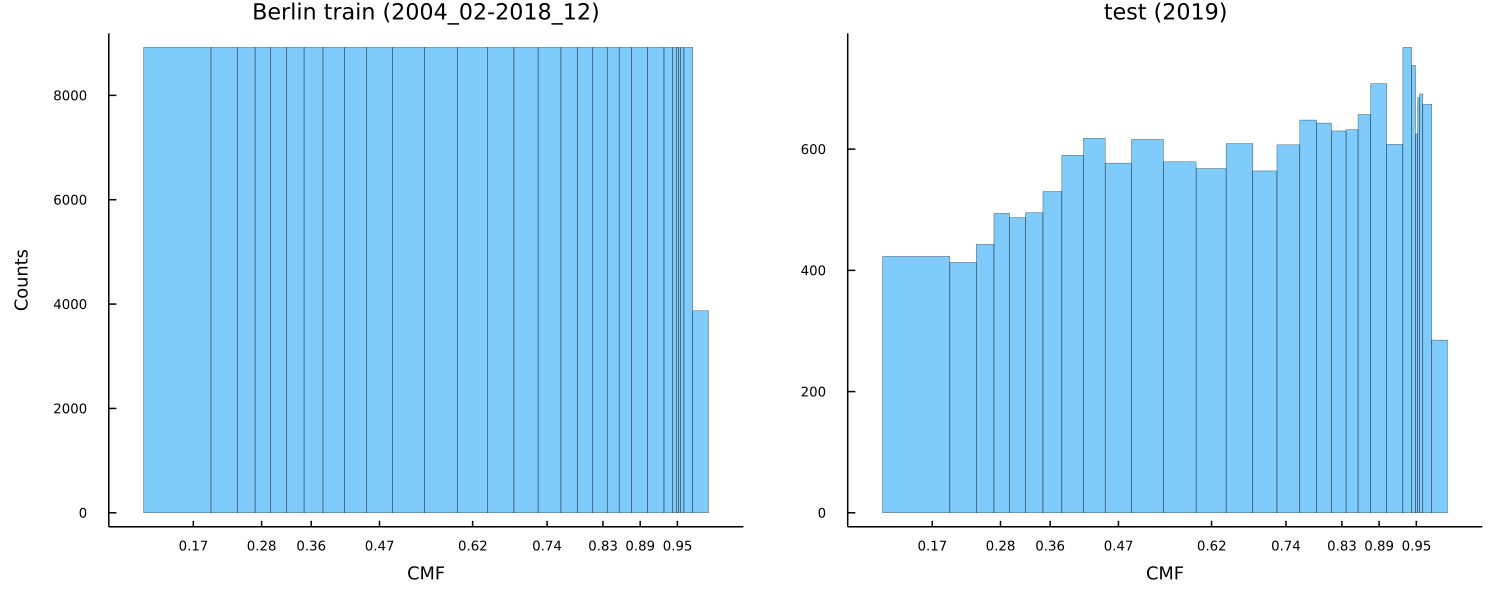

In [15]:
Fig. 1: CMF distribution in Berlin.

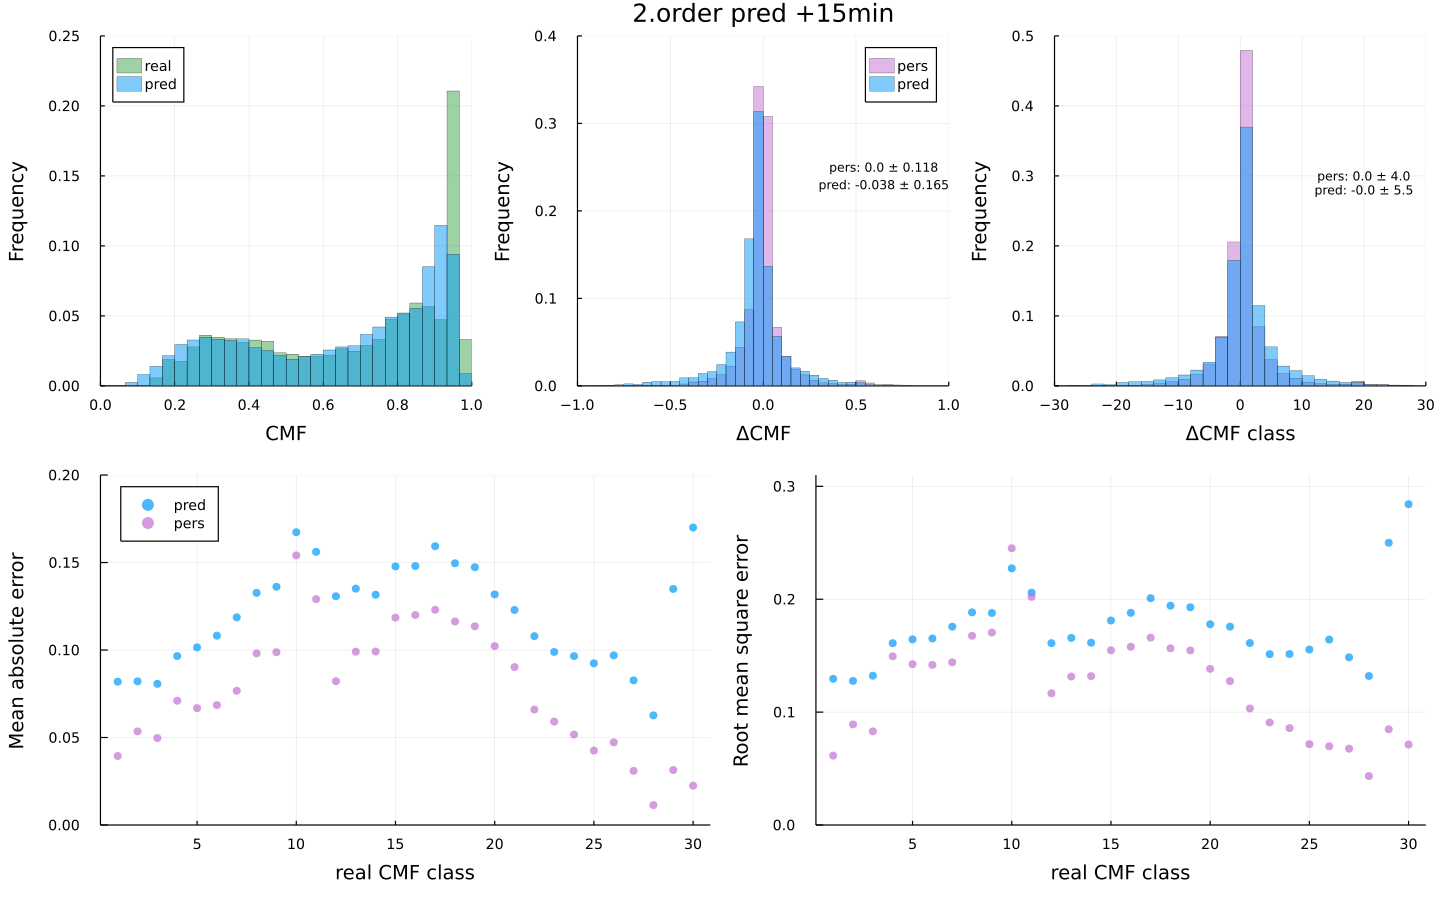

In [23]:
Fig. 2: Evaluation of 2. order Markov chain prediction for 15 min ahead.
Blue: MC prediction,
Green: real CMF,
Purple: persistence method (assume constant value from previous step)

#### Prediction scheme

In [ ]:
    for i in 1:length(pred) 
        obs1 = data_test[i] # 9:00
        pred1 = predict_od(obs1, od, n, T) # pred 9:15
        pred[i] = pred1
        if steps > 1 # +2
            pred2 = predict_od(pred1, od, n, T) # pred 9:30
            pred[i] = pred2
            if steps > 2 # +3 
                pred3 = predict_od(pred2, od, n, T) # pred 9:45
                pred[i] = pred3
                if steps > 3 # +4 
                    pred4 = predict_od(pred3, od, n, T) # pred 10:00
                    pred[i] = pred4          

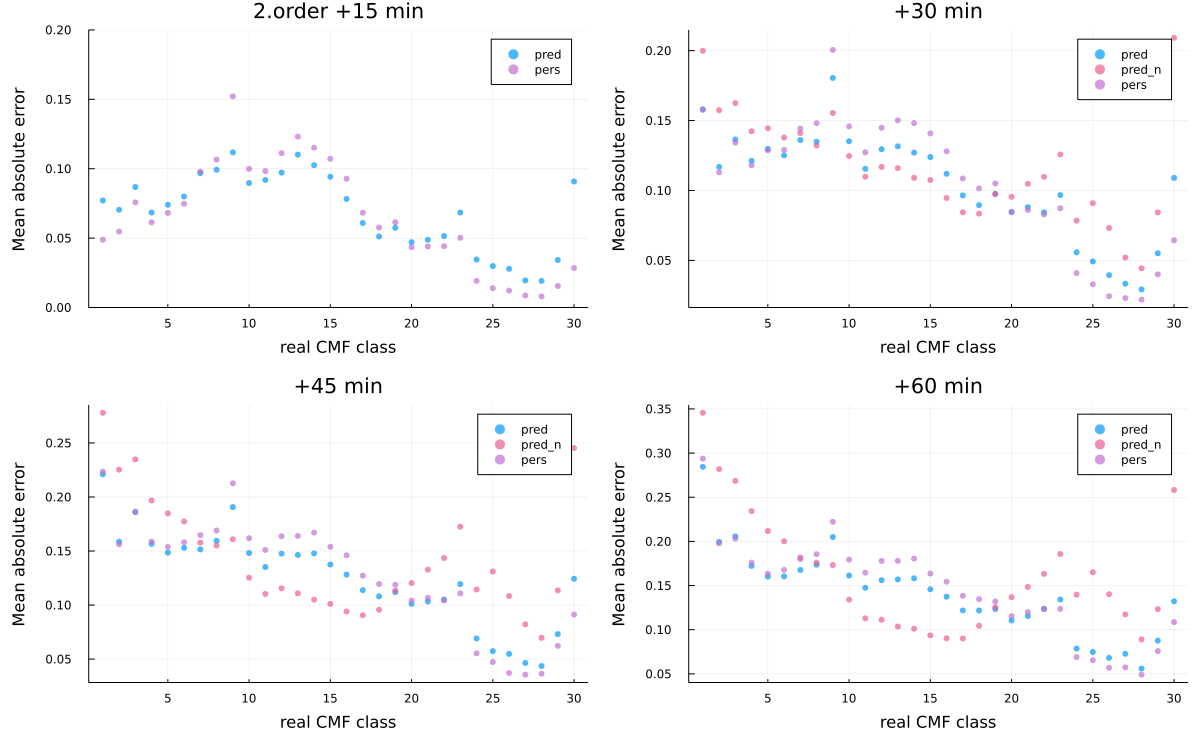

In [56]:
Fig. 3: Mean absolute errors of 2. order MC prediction for 15, 30, 45 & 60 min ahead.
Blue: MC prediction from observed transition,
Red: MC prediction from prediction at the previous step.    

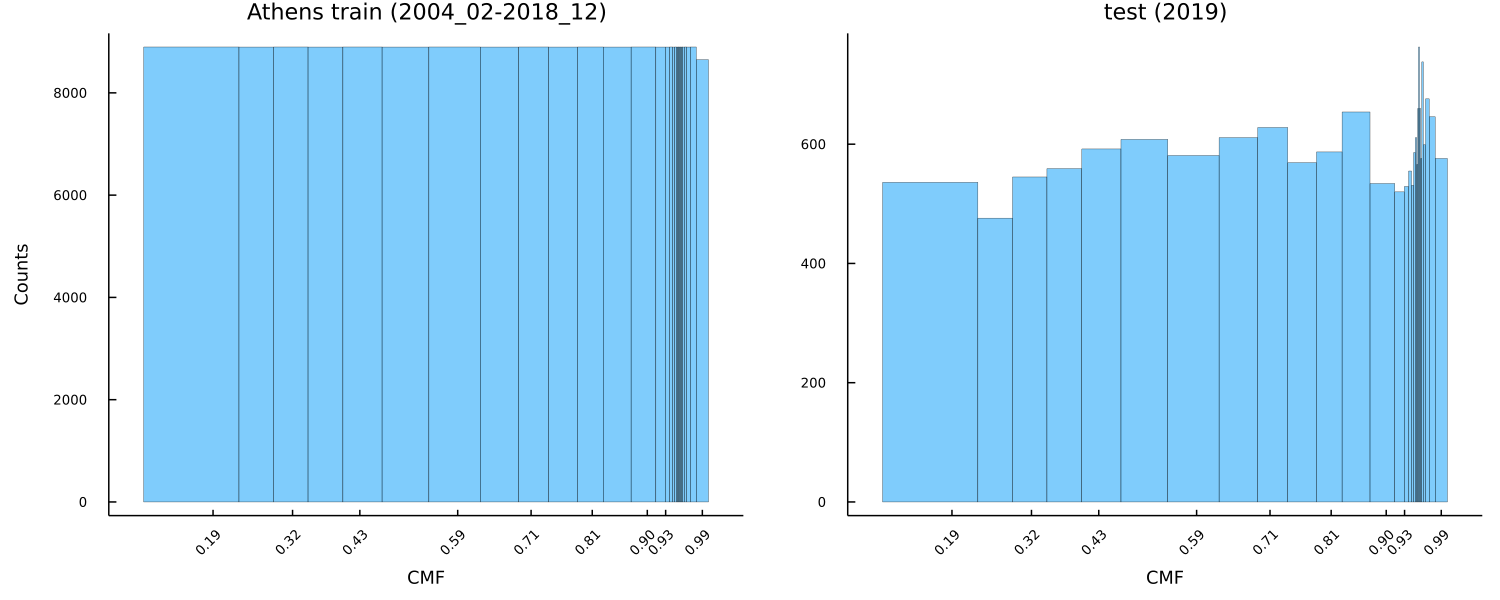

In [21]:
l = @layout [a b]
h_ep = plot(h_train, h_test, layout=l, leg=false, grid=false, xlabel="CMF", 
    lw=0.2, fillalpha=0.5, labelfontsize=8, titlefontsize=10, tickfontsize=6, xrotation=45,
    leftmargin=20px, bottommargin=20px, dpi=150, fmt=:png, size=(1000,400))

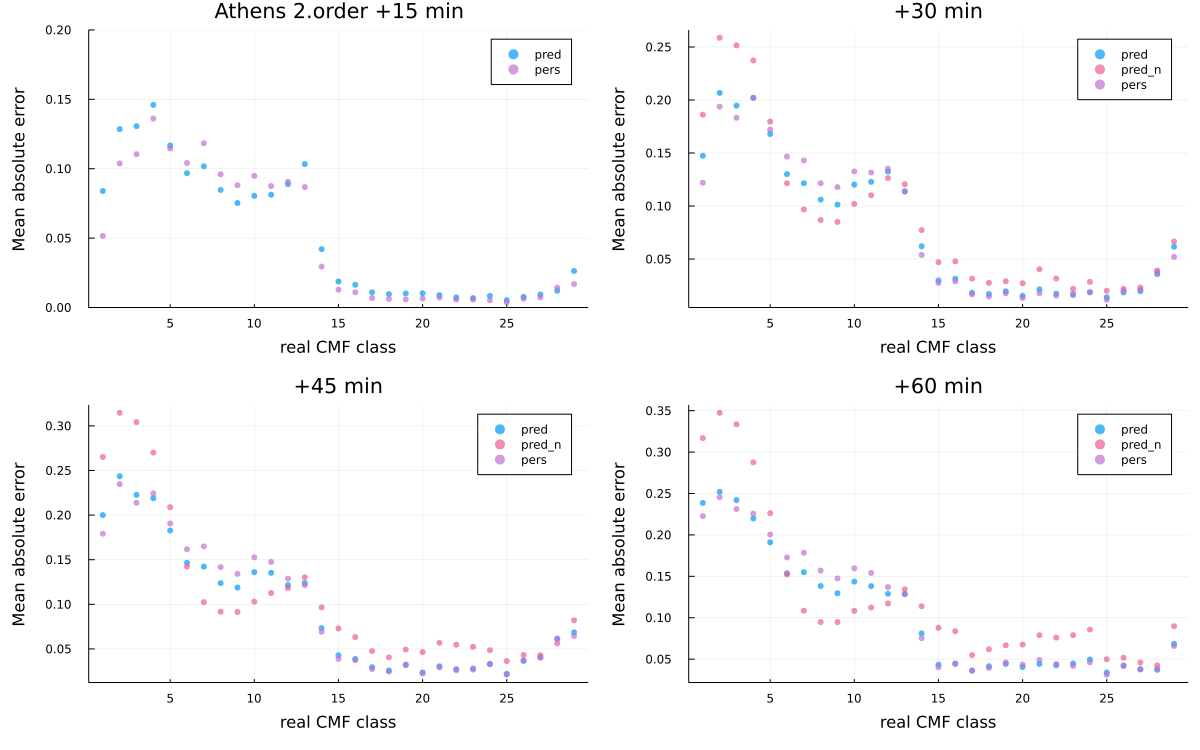

In [27]:
mae21 = mae_rmse(df21, tit="Athens 2.order +15 min")[1]

mae22 = viz_err(df22, "+30 min")
mae23 = viz_err(df23, "+45 min")
mae24 = viz_err(df24, "+60 min")

mae2 = plot(mae21, mae22, mae23, mae24, layout=@layout([a b; c d]), size=(1200, 750), # dpi=150, #ylim=(0, 0.35),
    left_margin=25px, bottom_margin=25px, fmt=:png)

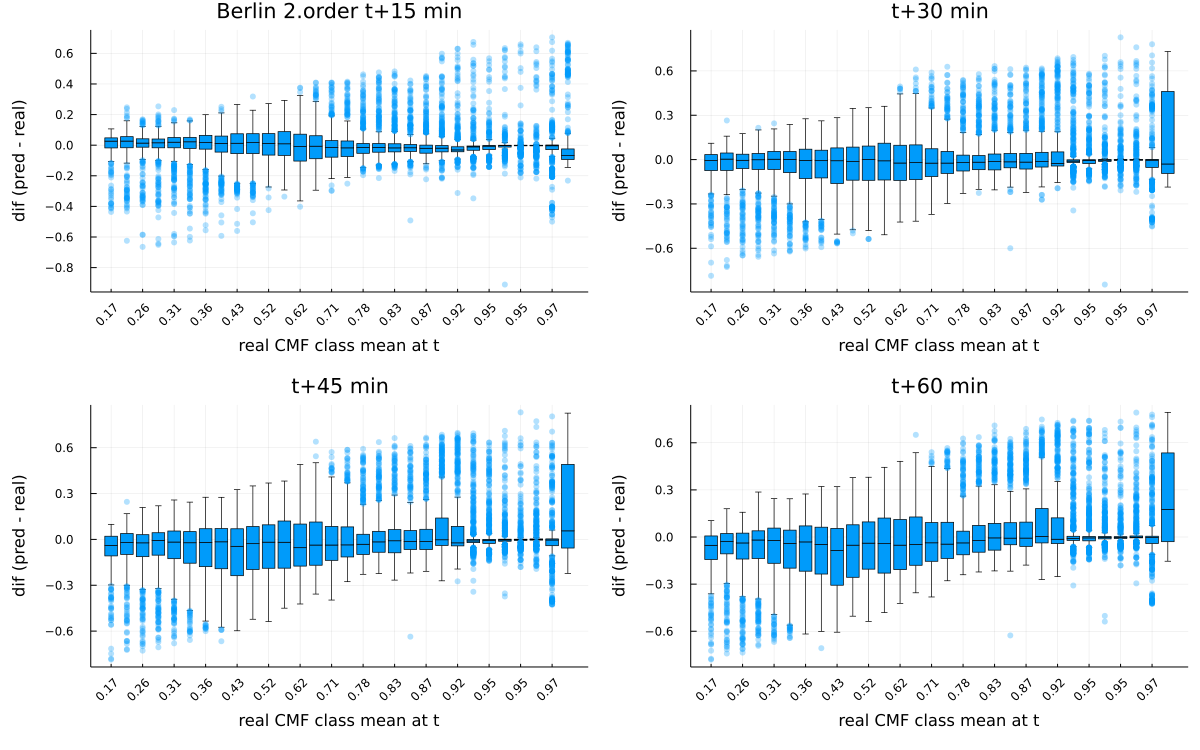

In [54]:
Fig. 4: Absolute error of MC prediction against real CMF.
Scattered 1.5*IQR below 1st. quartile and above 3rd. quartile are outliers.

- underestimate at low CMF (cloudy) and overestimate at high CMF (cloudless) due to unpredictable cloud state transition

## Next steps

- [ ] look into more literature
- [ ] reduce error by hybrid approach (MC prediction + persistence)
- [ ] experiment with measurement data, e.g. from Davos
- [ ] retrieve transition probability from western city

Thank you! Questions or feedback?